In [83]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#metrics and models
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [84]:
df=pd.read_csv(r'avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [42]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

All the varieties have same type(conventional). Hence, we can drop the this column. We can drop the date column as well

In [86]:
df.drop(columns=['Unnamed: 0','Date','type'],axis=1,inplace=True)

In [87]:
df.shape

(1517, 11)

In [88]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


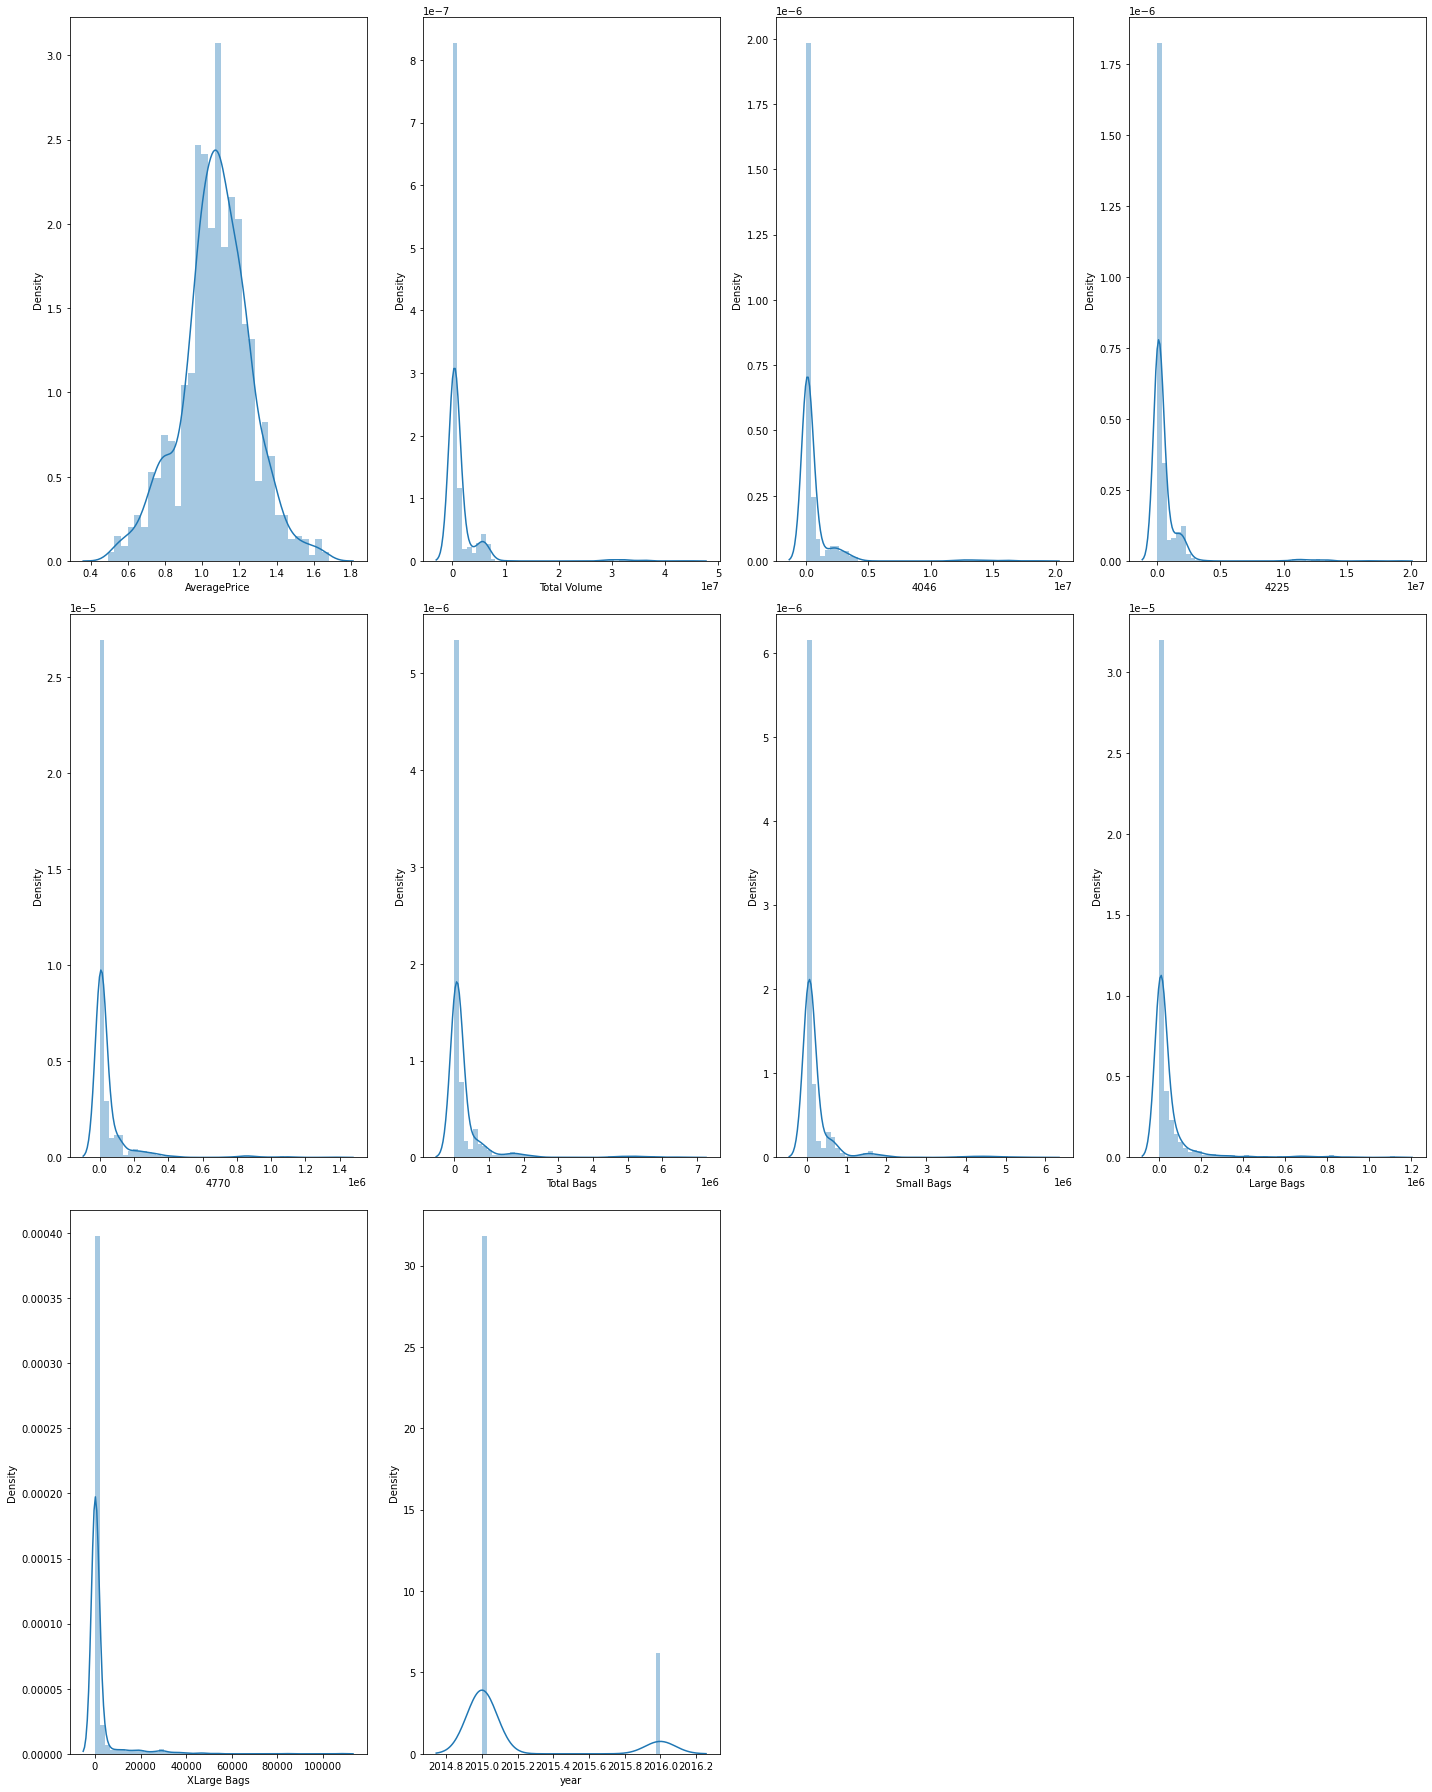

In [90]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=10:#we won't print for region as it has categorical values
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

There are some outliers so we need to perform data cleaning to get normally distributed data

In [91]:
q=df['Total Volume'].quantile(0.90)
df_cleaned=df[df['Total Volume']<q]

q=df['4046'].quantile(0.90)
df_cleaned=df_cleaned[df_cleaned['4046']<q]

q=df['4225'].quantile(0.90)
df_cleaned=df_cleaned[df_cleaned['4225']<q]

q=df['4770'].quantile(0.90)
df_cleaned=df_cleaned[df_cleaned['4770']<q]

q=df['Total Bags'].quantile(0.90)
df_cleaned=df_cleaned[df_cleaned['Total Bags']<q]

q=df['Small Bags'].quantile(0.90)
df_cleaned=df_cleaned[df_cleaned['Small Bags']<q]

q=df['Large Bags'].quantile(0.90)
df_cleaned=df_cleaned[df_cleaned['Large Bags']<q]

q=df['XLarge Bags'].quantile(0.90)
df_cleaned=df_cleaned[df_cleaned['XLarge Bags']<q]

Let's look at the data distribution after cleaning

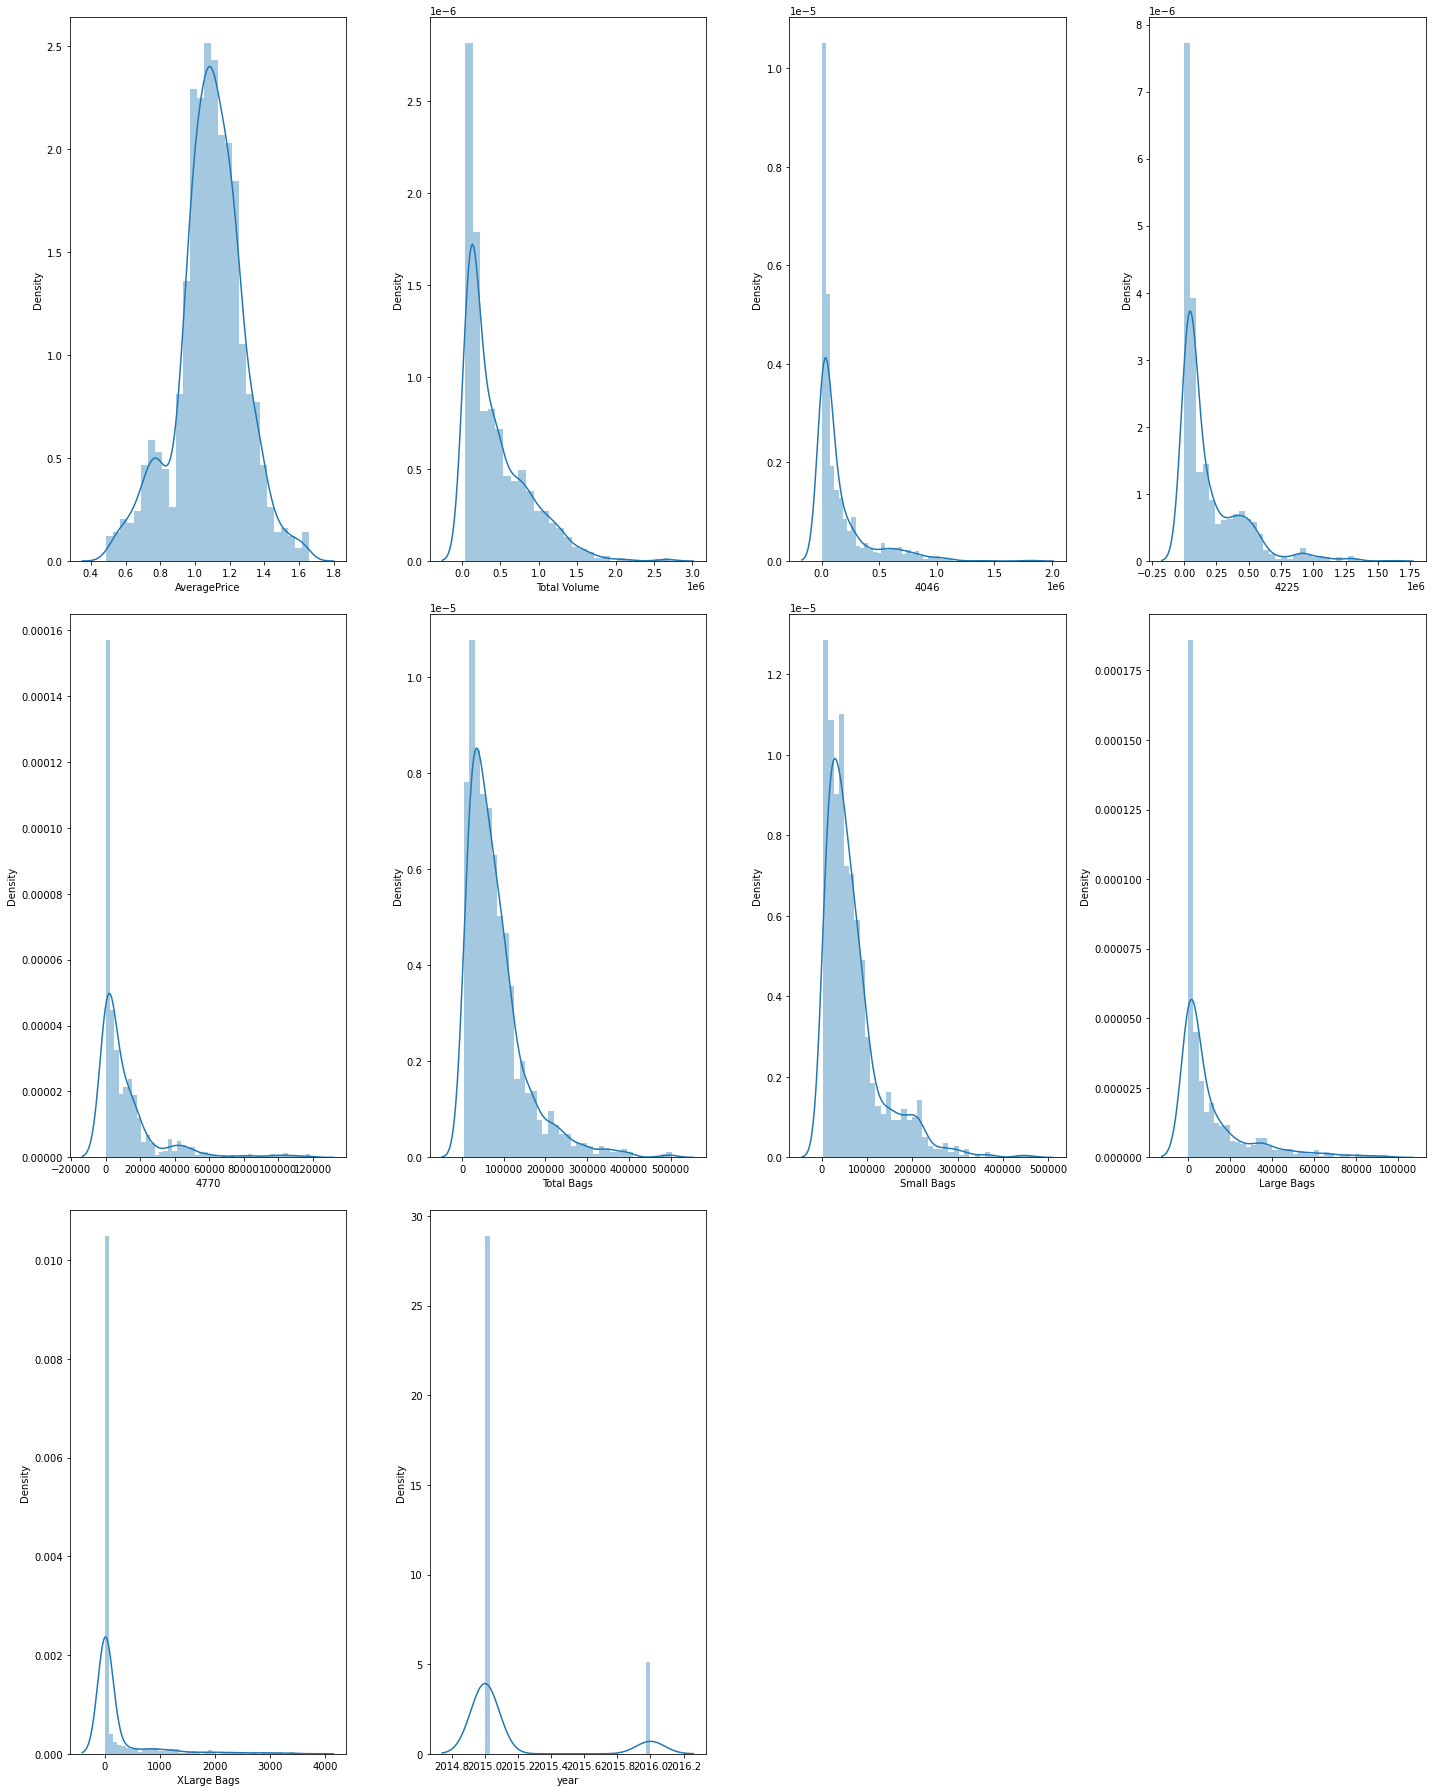

In [93]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df_cleaned:
    if plotnumber<=10:#we won't print for region as it has categorical values
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df_cleaned[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

There are still some outliers left in the data. But further may result in data loss. So, lets move ahead with furhter preprocessing

In [99]:
# Divide dataset into features and labels
x=df_cleaned.drop(['AveragePrice'],axis=1)
y=df_cleaned['AveragePrice']

In [104]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...
1512,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


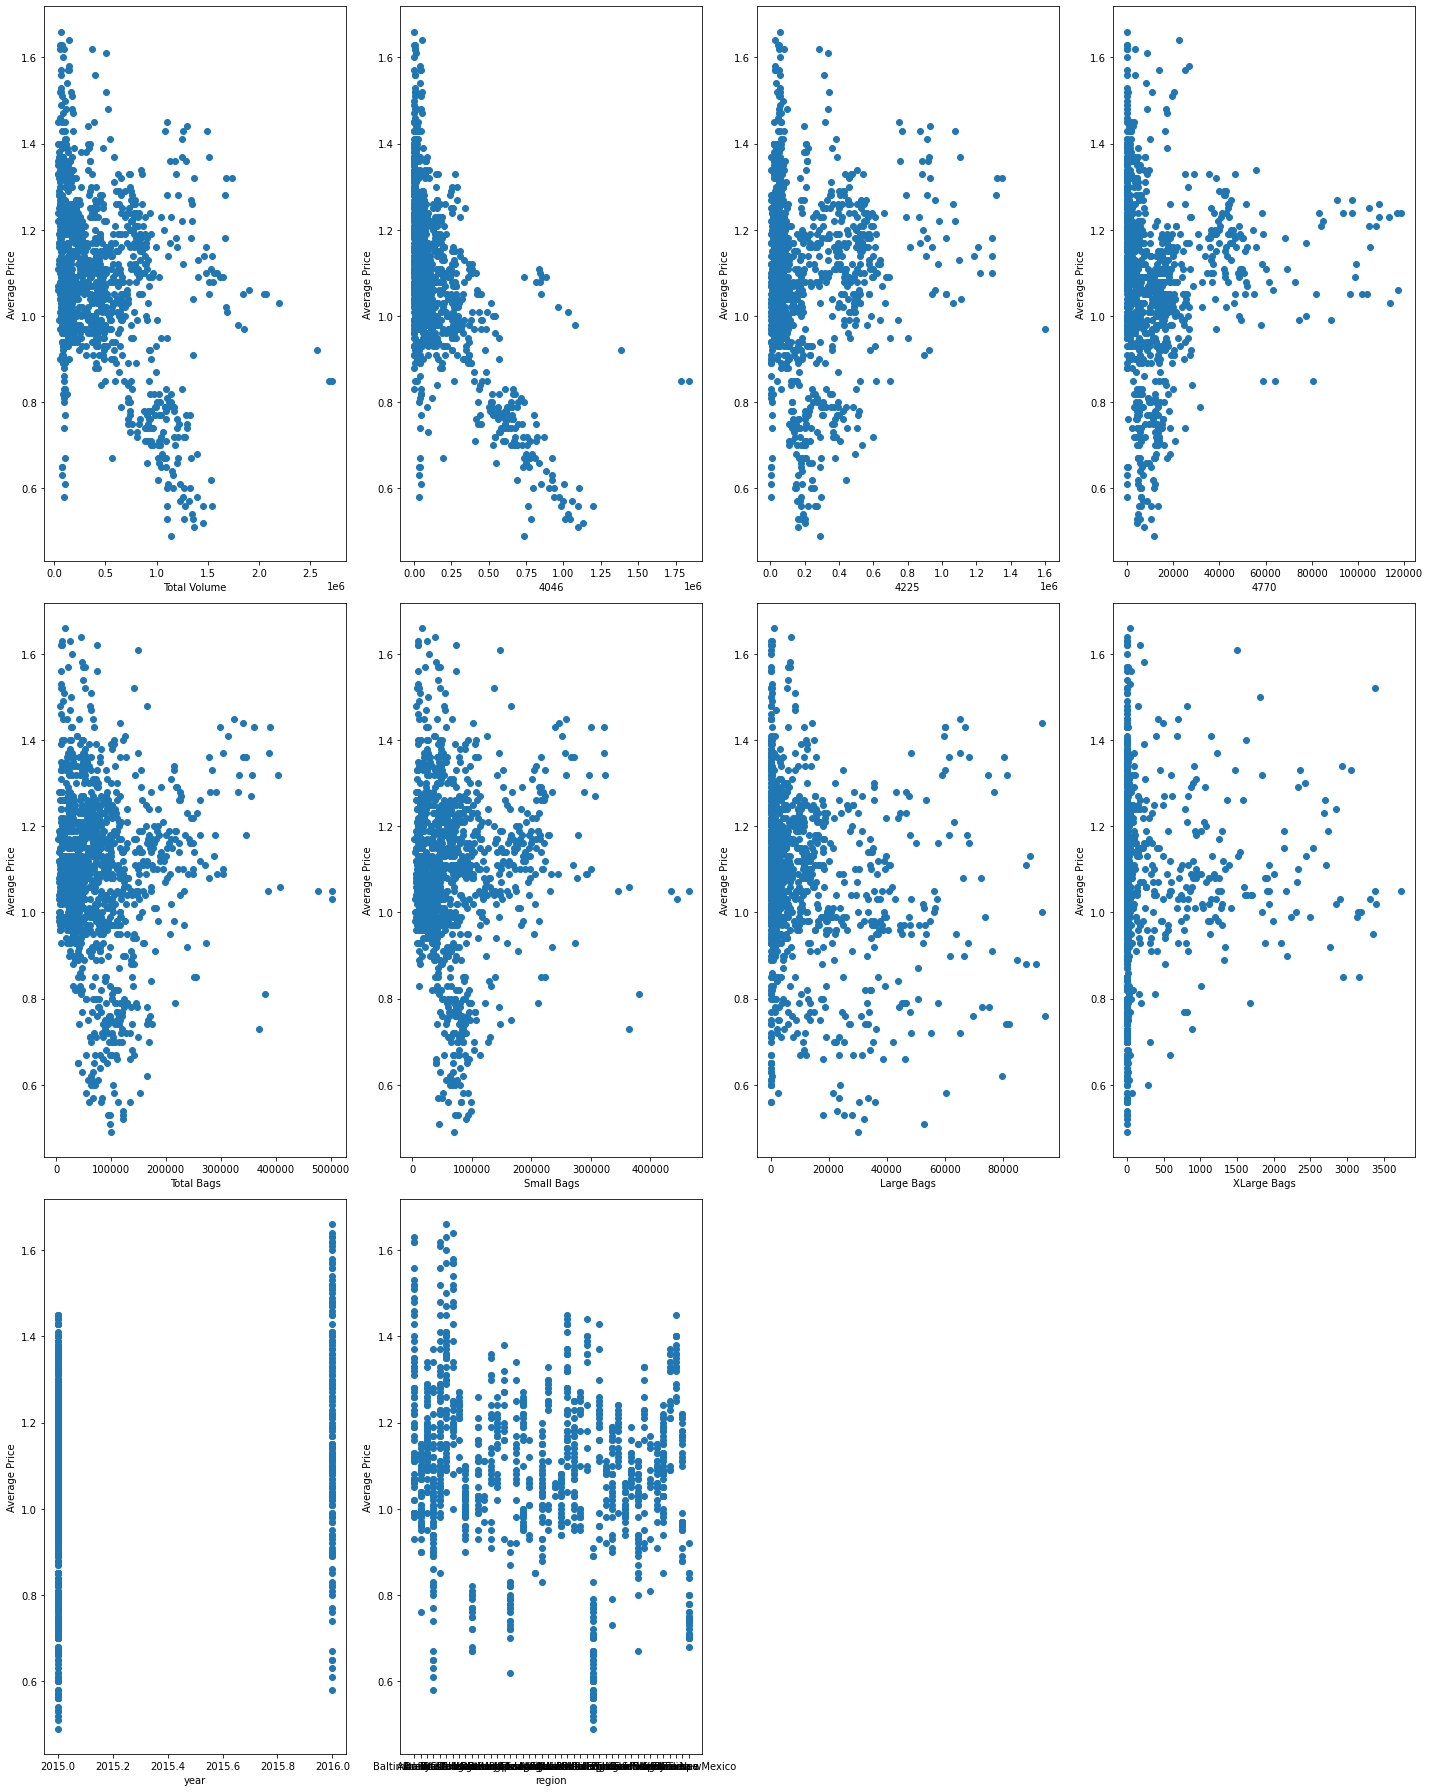

In [105]:
plt.figure(figsize=(20,25))

plotnumber=1

for column in x:
    if plotnumber <=11:
        ax=plt.subplot(3,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('Average Price')
    plotnumber+=1
plt.tight_layout()

The scatter plot clearly shows that relationship between features and labels is not linear

Filter Categorical Features

In [106]:
numerics=['int8','int16','int32','int64','float16','float32','float64']
categorical_columns=[]
features = df_cleaned.columns.values.tolist()

for col in features:
    if df_cleaned[col].dtype in numerics:
        continue
    categorical_columns.append(col)

In [107]:
categorical_columns

['region']

Encoding categorical columns using get_dummies

In [108]:
df_dummies = pd.get_dummies(df_cleaned[categorical_columns],drop_first=False)

In [109]:
df_dummies.head()

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_Charlotte,region_Chicago,region_Columbus,region_DallasFtWorth,...,region_Roanoke,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df=df_cleaned.join(df_dummies)

In [111]:
df.drop(columns=categorical_columns,axis=1,inplace=True)

In [112]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_Roanoke,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1222 entries, 0 to 1516
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                1222 non-null   float64
 1   Total Volume                1222 non-null   float64
 2   4046                        1222 non-null   float64
 3   4225                        1222 non-null   float64
 4   4770                        1222 non-null   float64
 5   Total Bags                  1222 non-null   float64
 6   Small Bags                  1222 non-null   float64
 7   Large Bags                  1222 non-null   float64
 8   XLarge Bags                 1222 non-null   float64
 9   year                        1222 non-null   int64  
 10  region_Albany               1222 non-null   uint8  
 11  region_Atlanta              1222 non-null   uint8  
 12  region_BaltimoreWashington  1222 non-null   uint8  
 13  region_Boise                1222 

In [114]:
# Divide dataset into features and labels
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [115]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [146]:
train_x, test_x, train_y, test_y = train_test_split(x_scaled,y, test_size=0.25, random_state=7)

# Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
reg=LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [149]:
reg.score(train_x,train_y)

0.73281107670698

In [150]:
reg.score(test_x,test_y)

0.7200973422327466

In [151]:
y_pred_lr=reg.predict(test_x)

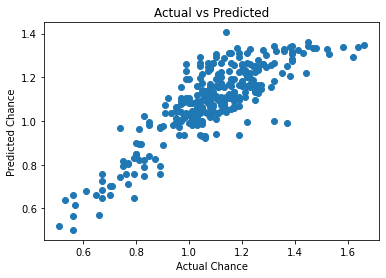

In [152]:
plt.scatter(test_y,y_pred_lr)
plt.xlabel('Actual Chance')
plt.ylabel('Predicted Chance')
plt.title('Actual vs Predicted')
plt.show()

In [153]:
r2_score(test_y,y_pred_lr)

0.7200973422327466

Let's try to reduce the number of features for better performance

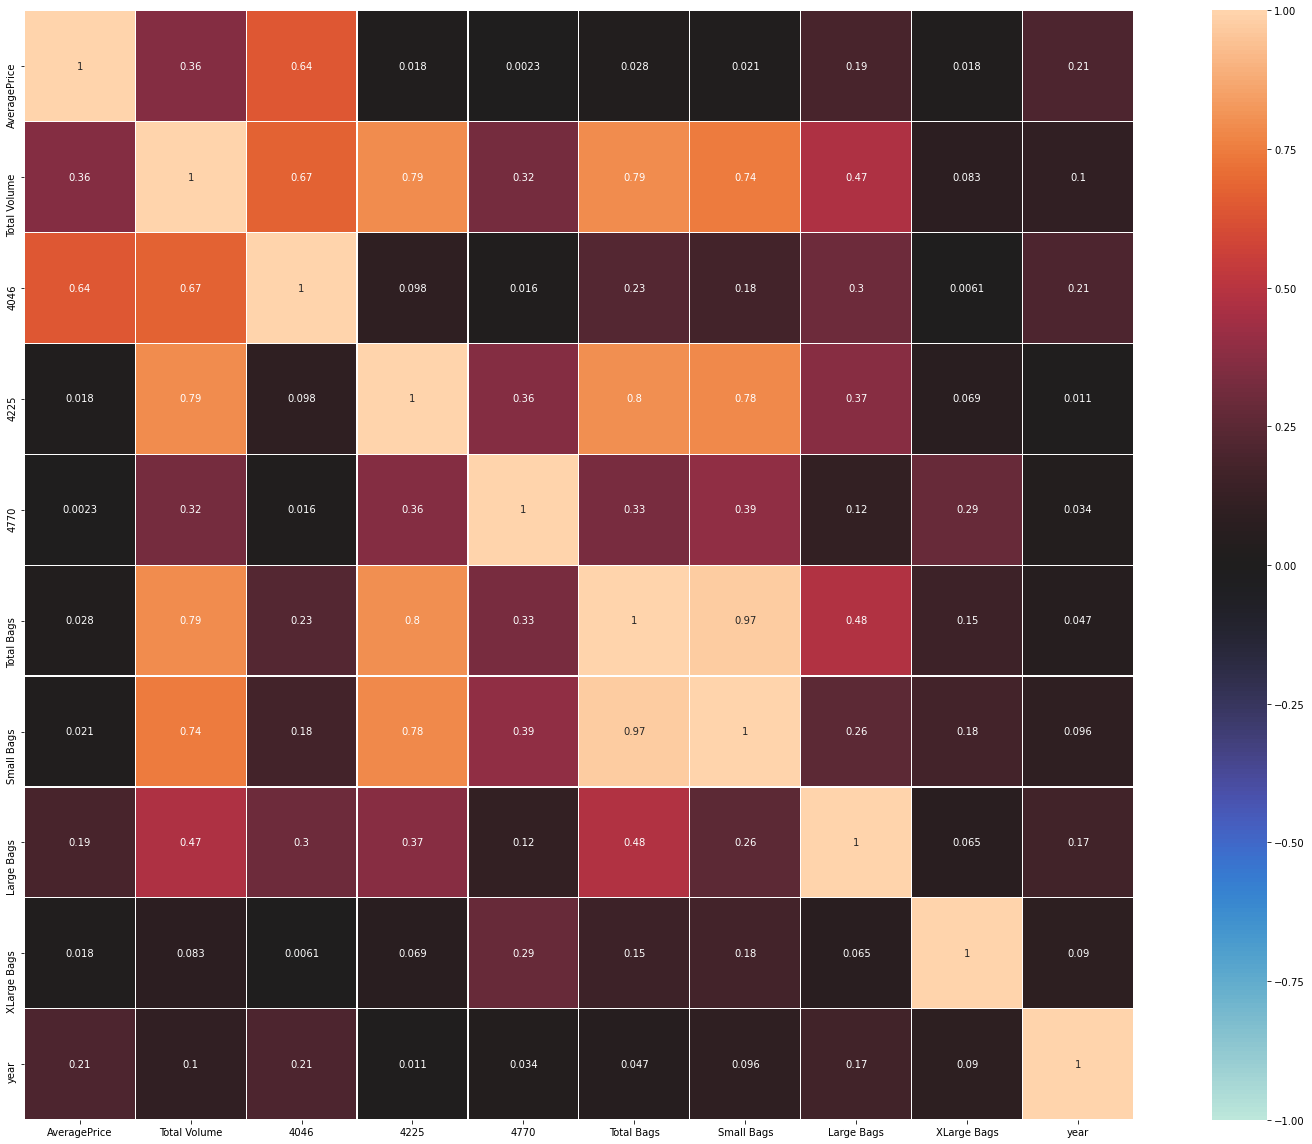

In [144]:
df_corr=df_cleaned.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr, vmin=-1,vmax=1, annot=True,
            square=True, center=0, fmt='.2g',linewidths=.1)
plt.tight_layout()

There is 0.97 corelation between Small Bags and Total Bags. So, lets drop small bags columns.

In [145]:
x=df.drop(['Small Bags'],axis=1)

In [154]:
x_scaled=scaler.fit_transform(x)
train_x, test_x, train_y, test_y = train_test_split(x_scaled,y, test_size=0.25, random_state=7)

# Random Forest

In [155]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [156]:
regressor.fit(train_x,train_y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [157]:
y_pred_rf = regressor.predict(test_x)

In [158]:
r2_score(test_y,y_pred_rf)

0.999610889058547

The accuracy of the random forest model is almost 100%

In [160]:
import pickle
with open ('AvocadoPricePredition.sav','wb') as f:
    pickle.dump(regressor,f)